# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [4]:
# Import your libraries:

%matplotlib inline

import numpy as np
import pandas as pd

In this lab, we will explore a dataset that describes websites with different features and labels them either benign or malicious . We will use supervised learning algorithms to figure out what feature patterns malicious websites are likely to have and use our model to predict malicious websites.

# Challenge 1 - Explore The Dataset

Let's start by exploring the dataset. First load the data file:

In [8]:
websites = pd.read_csv(r'C:\Users\hugoe\Desktop\LABS\lab-supervised-learning\data/website.csv')

#### Explore the data from an bird's-eye view.

You should already been very familiar with the procedures now so we won't provide the instructions step by step. Reflect on what you did in the previous labs and explore the dataset.

Things you'll be looking for:

* What the dataset looks like?
* What are the data types?
* Which columns contain the features of the websites?
* Which column contains the feature we will predict? What is the code standing for benign vs malicious websites?
* Do we need to transform any of the columns from categorical to ordinal values? If so what are these columns?

Feel free to add additional cells for your explorations. Make sure to comment what you find out.

In [10]:
# Your code here
websites.head()

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,...,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,7,iso-8859-1,nginx,263.0,NaN,NaN,10/10/2015 18:21,NaN,...,0,2,700,9,10,1153,832,9,2.0,1
1,B0_2314,16,6,UTF-8,Apache/2.4.10,15087.0,NaN,NaN,NaN,NaN,...,7,4,1230,17,19,1265,1230,17,0.0,0
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0.0,0
3,B0_113,17,6,ISO-8859-1,nginx,162.0,US,AK,7/10/1997 4:00,12/09/2013 0:45,...,22,3,3812,39,37,18784,4380,39,8.0,0
4,B0_403,17,6,UTF-8,NaN,124140.0,US,TX,12/05/1996 0:00,11/04/2017 0:00,...,2,5,4278,61,62,129889,4586,61,4.0,0


In [12]:
websites.shape


(1781, 21)

In [14]:
websites.dtypes


URL                           object
URL_LENGTH                     int64
NUMBER_SPECIAL_CHARACTERS      int64
CHARSET                       object
SERVER                        object
CONTENT_LENGTH               float64
WHOIS_COUNTRY                 object
WHOIS_STATEPRO                object
WHOIS_REGDATE                 object
WHOIS_UPDATED_DATE            object
TCP_CONVERSATION_EXCHANGE      int64
DIST_REMOTE_TCP_PORT           int64
REMOTE_IPS                     int64
APP_BYTES                      int64
SOURCE_APP_PACKETS             int64
REMOTE_APP_PACKETS             int64
SOURCE_APP_BYTES               int64
REMOTE_APP_BYTES               int64
APP_PACKETS                    int64
DNS_QUERY_TIMES              float64
Type                           int64
dtype: object

In [16]:
websites.isnull().sum()

URL                            0
URL_LENGTH                     0
NUMBER_SPECIAL_CHARACTERS      0
CHARSET                        7
SERVER                       176
CONTENT_LENGTH               812
WHOIS_COUNTRY                306
WHOIS_STATEPRO               362
WHOIS_REGDATE                127
WHOIS_UPDATED_DATE           139
TCP_CONVERSATION_EXCHANGE      0
DIST_REMOTE_TCP_PORT           0
REMOTE_IPS                     0
APP_BYTES                      0
SOURCE_APP_PACKETS             0
REMOTE_APP_PACKETS             0
SOURCE_APP_BYTES               0
REMOTE_APP_BYTES               0
APP_PACKETS                    0
DNS_QUERY_TIMES                1
Type                           0
dtype: int64

In [18]:
websites.columns


Index(['URL', 'URL_LENGTH', 'NUMBER_SPECIAL_CHARACTERS', 'CHARSET', 'SERVER',
       'CONTENT_LENGTH', 'WHOIS_COUNTRY', 'WHOIS_STATEPRO', 'WHOIS_REGDATE',
       'WHOIS_UPDATED_DATE', 'TCP_CONVERSATION_EXCHANGE',
       'DIST_REMOTE_TCP_PORT', 'REMOTE_IPS', 'APP_BYTES', 'SOURCE_APP_PACKETS',
       'REMOTE_APP_PACKETS', 'SOURCE_APP_BYTES', 'REMOTE_APP_BYTES',
       'APP_PACKETS', 'DNS_QUERY_TIMES', 'Type'],
      dtype='object')

In [29]:
websites['Type'].value_counts()
websites['Type'] = websites['Type'].map({'benign': 0, 'malicious': 1})


Type
0    1565
1     216
Name: count, dtype: int64

In [31]:
websites['Type'] = websites['Type'].map({'benign': 0, 'malicious': 1})


In [33]:
websites['Type'].value_counts()

Series([], Name: count, dtype: int64)

In [35]:
categorical_columns = websites.select_dtypes(include=['object', 'category']).columns
categorical_columns


Index(['URL', 'CHARSET', 'SERVER', 'WHOIS_COUNTRY', 'WHOIS_STATEPRO',
       'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE'],
      dtype='object')

In [37]:
websites.describe()

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CONTENT_LENGTH,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
count,1781.000000,1781.000000,969.000000,1781.000000,1781.000000,1781.000000,1.781000e+03,1781.000000,1781.000000,1.781000e+03,1.781000e+03,1781.000000,1780.000000,0.0
mean,56.961258,11.111735,11726.927761,16.261089,5.472768,3.060640,2.982339e+03,18.540146,18.746210,1.589255e+04,3.155599e+03,18.540146,2.263483,NaN
std,27.555586,4.549896,36391.809051,40.500975,21.807327,3.386975,5.605057e+04,41.627173,46.397969,6.986193e+04,5.605378e+04,41.627173,2.930853,NaN
min,16.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,NaN
25%,39.000000,8.000000,324.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,NaN
50%,49.000000,10.000000,1853.000000,7.000000,0.000000,2.000000,6.720000e+02,8.000000,9.000000,5.790000e+02,7.350000e+02,8.000000,0.000000,NaN
75%,68.000000,13.000000,11323.000000,22.000000,5.000000,5.000000,2.328000e+03,26.000000,25.000000,9.806000e+03,2.701000e+03,26.000000,4.000000,NaN
max,249.000000,43.000000,649263.000000,1194.000000,708.000000,17.000000,2.362906e+06,1198.000000,1284.000000,2.060012e+06,2.362906e+06,1198.000000,20.000000,NaN


In [4]:
# Your comment here

#### Next, evaluate if the columns in this dataset are strongly correlated.

If our dataset has strongly correlated columns, we need to choose certain ML algorithms instead of others. We need to evaluate this for our dataset now.

Luckily, most of the columns in this dataset are ordinal which makes things a lot easier for us. In the next cells below, evaluate the level of collinearity of the data.

We provide some general directions for you to consult in order to complete this step:

1. You will create a correlation matrix using the numeric columns in the dataset.

1. Create a heatmap using `seaborn` to visualize which columns have high collinearity.

1. Comment on which columns you might need to remove due to high collinearity.

In [41]:
# Your code here
import seaborn as sns
import matplotlib.pyplot as plt

In [43]:
numeric_columns = websites.select_dtypes(include=['float64', 'int64']).columns
numeric_columns

Index(['URL_LENGTH', 'NUMBER_SPECIAL_CHARACTERS', 'CONTENT_LENGTH',
       'TCP_CONVERSATION_EXCHANGE', 'DIST_REMOTE_TCP_PORT', 'REMOTE_IPS',
       'APP_BYTES', 'SOURCE_APP_PACKETS', 'REMOTE_APP_PACKETS',
       'SOURCE_APP_BYTES', 'REMOTE_APP_BYTES', 'APP_PACKETS',
       'DNS_QUERY_TIMES', 'Type'],
      dtype='object')

In [45]:
correlation_matrix = websites[numeric_columns].corr()
correlation_matrix

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CONTENT_LENGTH,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
URL_LENGTH,1.000000,0.917986,0.129745,-0.038407,-0.039839,-0.046367,-0.026446,-0.042264,-0.033779,-0.014857,-0.026686,-0.042264,-0.068582,NaN
NUMBER_SPECIAL_CHARACTERS,0.917986,1.000000,0.214225,-0.037459,-0.042619,-0.047103,-0.023914,-0.040096,-0.030597,-0.014376,-0.024098,-0.040096,-0.050048,NaN
CONTENT_LENGTH,0.129745,0.214225,1.000000,0.078451,-0.000381,0.004774,0.051202,0.074142,0.091077,0.100094,0.047595,0.074142,-0.045644,NaN
TCP_CONVERSATION_EXCHANGE,-0.038407,-0.037459,0.078451,1.000000,0.555188,0.331080,0.457320,0.997796,0.990848,0.865580,0.458702,0.997796,0.349832,NaN
DIST_REMOTE_TCP_PORT,-0.039839,-0.042619,-0.000381,0.555188,1.000000,0.210188,0.780238,0.558612,0.591188,0.313359,0.781212,0.558612,0.259942,NaN
REMOTE_IPS,-0.046367,-0.047103,0.004774,0.331080,0.210188,1.000000,0.023126,0.361104,0.304683,0.171651,0.025324,0.361104,0.548189,NaN
APP_BYTES,-0.026446,-0.023914,0.051202,0.457320,0.780238,0.023126,1.000000,0.445822,0.468999,0.074464,0.999992,0.445822,0.012221,NaN
SOURCE_APP_PACKETS,-0.042264,-0.040096,0.074142,0.997796,0.558612,0.361104,0.445822,1.000000,0.989285,0.857495,0.447448,1.000000,0.410843,NaN
REMOTE_APP_PACKETS,-0.033779,-0.030597,0.091077,0.990848,0.591188,0.304683,0.468999,0.989285,1.000000,0.880555,0.470401,0.989285,0.355716,NaN
SOURCE_APP_BYTES,-0.014857,-0.014376,0.100094,0.865580,0.313359,0.171651,0.074464,0.857495,0.880555,1.000000,0.075328,0.857495,0.215285,NaN


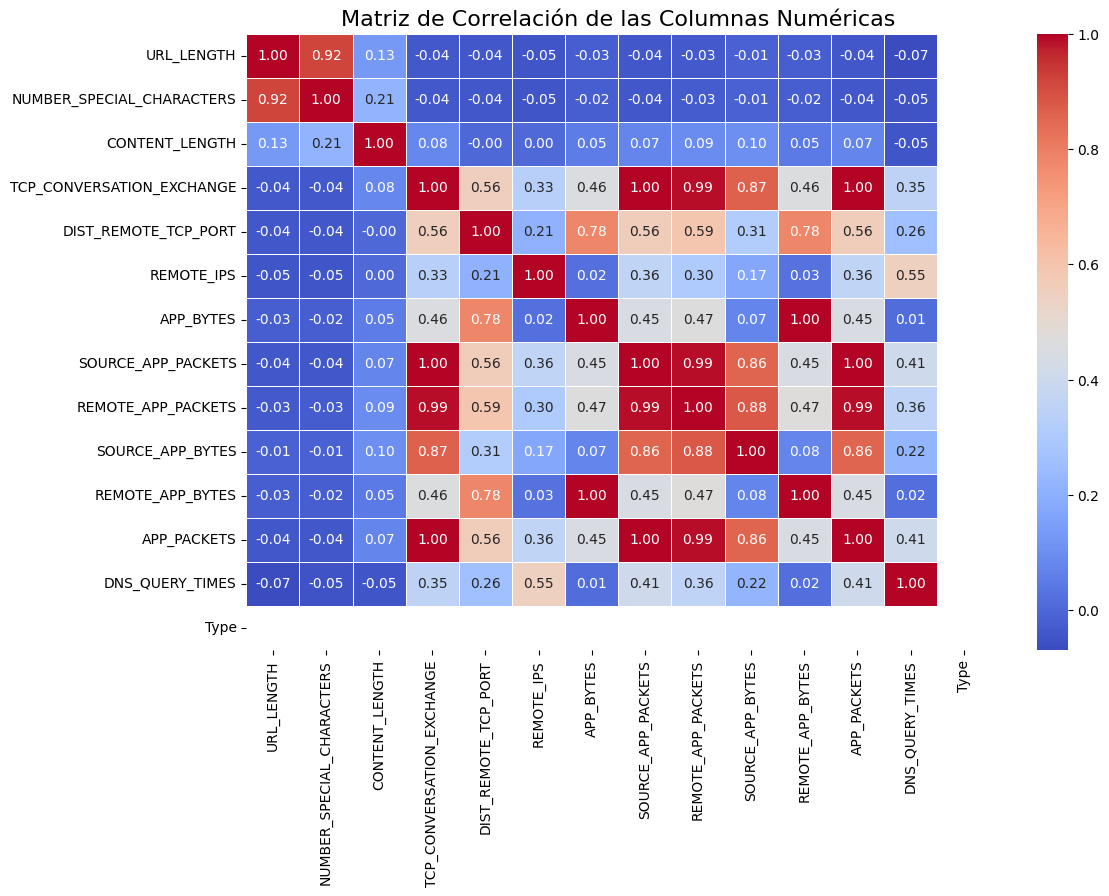

In [47]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar=True)
plt.title("Matriz de Correlación de las Columnas Numéricas", fontsize=16)
plt.show()


In [6]:
# Your comment here

# Challenge 2 - Remove Column Collinearity.

From the heatmap you created, you should have seen at least 3 columns that can be removed due to high collinearity. Remove these columns from the dataset.

Note that you should remove as few columns as you can. You don't have to remove all the columns at once. But instead, try removing one column, then produce the heatmap again to determine if additional columns should be removed. As long as the dataset no longer contains columns that are correlated for over 90%, you can stop. Also, keep in mind when two columns have high collinearity, you only need to remove one of them but not both.

In the cells below, remove as few columns as you can to eliminate the high collinearity in the dataset. Make sure to comment on your way so that the instructional team can learn about your thinking process which allows them to give feedback. At the end, print the heatmap again.

In [49]:
# Your code here
websites_cleaned = websites.copy()


In [51]:
highly_correlated_pairs = []


In [53]:
for col in correlation_matrix.columns:
    for row in correlation_matrix.index:
        if abs(correlation_matrix.loc[row, col]) > 0.9 and row != col:
            highly_correlated_pairs.append((row, col))


In [55]:
highly_correlated_pairs

[('NUMBER_SPECIAL_CHARACTERS', 'URL_LENGTH'),
 ('URL_LENGTH', 'NUMBER_SPECIAL_CHARACTERS'),
 ('SOURCE_APP_PACKETS', 'TCP_CONVERSATION_EXCHANGE'),
 ('REMOTE_APP_PACKETS', 'TCP_CONVERSATION_EXCHANGE'),
 ('APP_PACKETS', 'TCP_CONVERSATION_EXCHANGE'),
 ('REMOTE_APP_BYTES', 'APP_BYTES'),
 ('TCP_CONVERSATION_EXCHANGE', 'SOURCE_APP_PACKETS'),
 ('REMOTE_APP_PACKETS', 'SOURCE_APP_PACKETS'),
 ('APP_PACKETS', 'SOURCE_APP_PACKETS'),
 ('TCP_CONVERSATION_EXCHANGE', 'REMOTE_APP_PACKETS'),
 ('SOURCE_APP_PACKETS', 'REMOTE_APP_PACKETS'),
 ('APP_PACKETS', 'REMOTE_APP_PACKETS'),
 ('APP_BYTES', 'REMOTE_APP_BYTES'),
 ('TCP_CONVERSATION_EXCHANGE', 'APP_PACKETS'),
 ('SOURCE_APP_PACKETS', 'APP_PACKETS'),
 ('REMOTE_APP_PACKETS', 'APP_PACKETS')]

In [57]:
websites_cleaned = websites_cleaned.drop(columns=['NUMBER_SPECIAL_CHARACTERS', 'URL_LENGTH', 'CONTENT_LENGTH'])


In [63]:
websites_cleaned.columns

Index(['URL', 'CHARSET', 'SERVER', 'WHOIS_COUNTRY', 'WHOIS_STATEPRO',
       'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE', 'TCP_CONVERSATION_EXCHANGE',
       'DIST_REMOTE_TCP_PORT', 'REMOTE_IPS', 'APP_BYTES', 'SOURCE_APP_PACKETS',
       'REMOTE_APP_PACKETS', 'SOURCE_APP_BYTES', 'REMOTE_APP_BYTES',
       'APP_PACKETS', 'DNS_QUERY_TIMES', 'Type'],
      dtype='object')

In [65]:
websites_cleaned.dtypes

URL                           object
CHARSET                       object
SERVER                        object
WHOIS_COUNTRY                 object
WHOIS_STATEPRO                object
WHOIS_REGDATE                 object
WHOIS_UPDATED_DATE            object
TCP_CONVERSATION_EXCHANGE      int64
DIST_REMOTE_TCP_PORT           int64
REMOTE_IPS                     int64
APP_BYTES                      int64
SOURCE_APP_PACKETS             int64
REMOTE_APP_PACKETS             int64
SOURCE_APP_BYTES               int64
REMOTE_APP_BYTES               int64
APP_PACKETS                    int64
DNS_QUERY_TIMES              float64
Type                         float64
dtype: object

In [69]:
numeric_columns_cleaned = websites_cleaned.select_dtypes(include=['float64', 'int64']).columns
numeric_columns_cleaned 

Index(['TCP_CONVERSATION_EXCHANGE', 'DIST_REMOTE_TCP_PORT', 'REMOTE_IPS',
       'APP_BYTES', 'SOURCE_APP_PACKETS', 'REMOTE_APP_PACKETS',
       'SOURCE_APP_BYTES', 'REMOTE_APP_BYTES', 'APP_PACKETS',
       'DNS_QUERY_TIMES', 'Type'],
      dtype='object')

In [71]:
correlation_matrix_cleaned = websites_cleaned[numeric_columns_cleaned].corr()
correlation_matrix_cleaned

,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
TCP_CONVERSATION_EXCHANGE,1.000000,0.555188,0.331080,0.457320,0.997796,0.990848,0.865580,0.458702,0.997796,0.349832,NaN
DIST_REMOTE_TCP_PORT,0.555188,1.000000,0.210188,0.780238,0.558612,0.591188,0.313359,0.781212,0.558612,0.259942,NaN
REMOTE_IPS,0.331080,0.210188,1.000000,0.023126,0.361104,0.304683,0.171651,0.025324,0.361104,0.548189,NaN
APP_BYTES,0.457320,0.780238,0.023126,1.000000,0.445822,0.468999,0.074464,0.999992,0.445822,0.012221,NaN
SOURCE_APP_PACKETS,0.997796,0.558612,0.361104,0.445822,1.000000,0.989285,0.857495,0.447448,1.000000,0.410843,NaN
REMOTE_APP_PACKETS,0.990848,0.591188,0.304683,0.468999,0.989285,1.000000,0.880555,0.470401,0.989285,0.355716,NaN
SOURCE_APP_BYTES,0.865580,0.313359,0.171651,0.074464,0.857495,0.880555,1.000000,0.075328,0.857495,0.215285,NaN
REMOTE_APP_BYTES,0.458702,0.781212,0.025324,0.999992,0.447448,0.470401,0.075328,1.000000,0.447448,0.016215,NaN
APP_PACKETS,0.997796,0.558612,0.361104,0.445822,1.000000,0.989285,0.857495,0.447448,1.000000,0.410843,NaN
DNS_QUERY_TIMES,0.349832,0.259942,0.548189,0.012221,0.410843,0.355716,0.215285,0.016215,0.410843,1.000000,NaN


In [8]:
# Your comment here

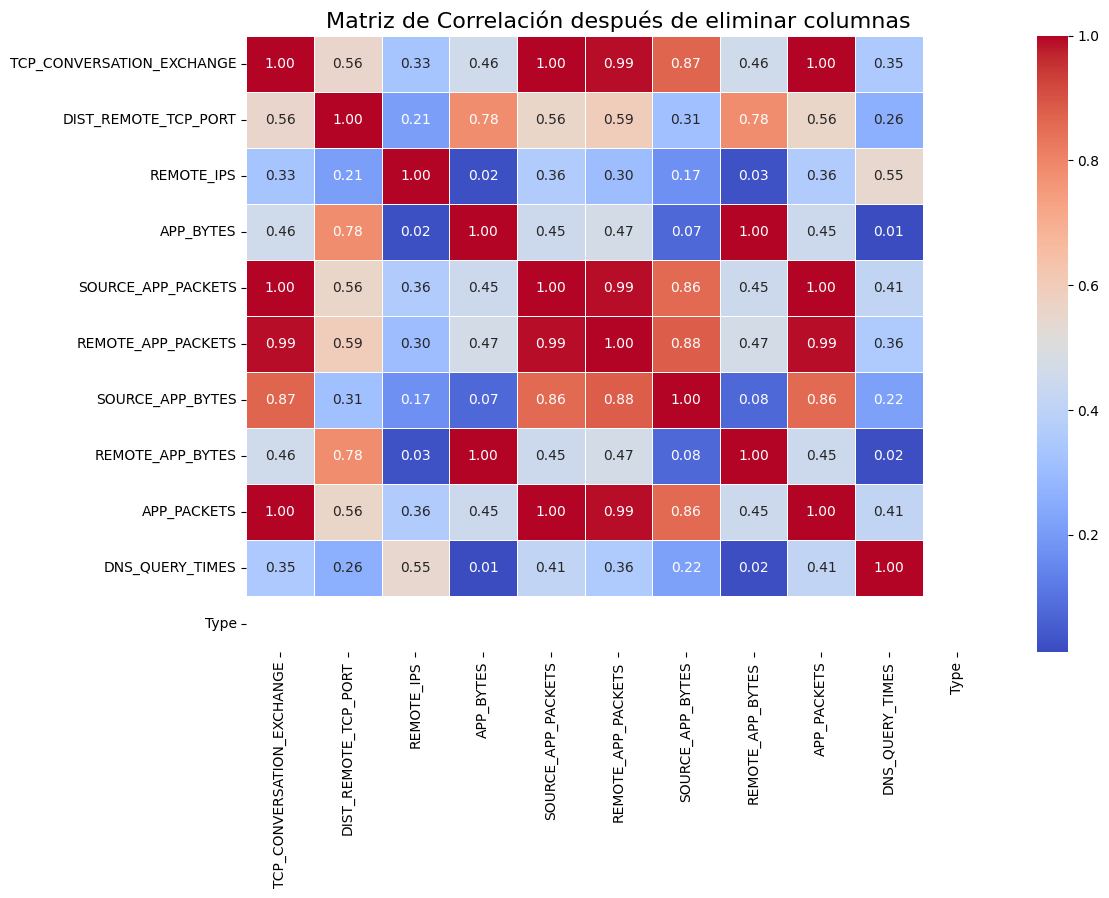

In [73]:
# Print heatmap again
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_cleaned, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar=True)
plt.title("Matriz de Correlación después de eliminar columnas", fontsize=16)
plt.show()

# Challenge 3 - Handle Missing Values

The next step would be handling missing values. **We start by examining the number of missing values in each column, which you will do in the next cell.**

In [75]:
# Your code here
missing_values = websites_cleaned.isnull().sum()
missing_values

URL                             0
CHARSET                         7
SERVER                        176
WHOIS_COUNTRY                 306
WHOIS_STATEPRO                362
WHOIS_REGDATE                 127
WHOIS_UPDATED_DATE            139
TCP_CONVERSATION_EXCHANGE       0
DIST_REMOTE_TCP_PORT            0
REMOTE_IPS                      0
APP_BYTES                       0
SOURCE_APP_PACKETS              0
REMOTE_APP_PACKETS              0
SOURCE_APP_BYTES                0
REMOTE_APP_BYTES                0
APP_PACKETS                     0
DNS_QUERY_TIMES                 1
Type                         1781
dtype: int64

In [77]:
missing_percentage = (missing_values / len(websites_cleaned)) * 100
missing_percentage

URL                            0.000000
CHARSET                        0.393038
SERVER                         9.882089
WHOIS_COUNTRY                 17.181359
WHOIS_STATEPRO                20.325660
WHOIS_REGDATE                  7.130825
WHOIS_UPDATED_DATE             7.804604
TCP_CONVERSATION_EXCHANGE      0.000000
DIST_REMOTE_TCP_PORT           0.000000
REMOTE_IPS                     0.000000
APP_BYTES                      0.000000
SOURCE_APP_PACKETS             0.000000
REMOTE_APP_PACKETS             0.000000
SOURCE_APP_BYTES               0.000000
REMOTE_APP_BYTES               0.000000
APP_PACKETS                    0.000000
DNS_QUERY_TIMES                0.056148
Type                         100.000000
dtype: float64

If you remember in the previous labs, we drop a column if the column contains a high proportion of missing values. After dropping those problematic columns, we drop the rows with missing values.

#### In the cells below, handle the missing values from the dataset. Remember to comment the rationale of your decisions.

In [82]:
# Your code here
threshold = 0.5  # Definimos el umbral como 50%
missing_percentage = (websites_cleaned.isnull().sum() / len(websites_cleaned)) > threshold
missing_percentage

URL                          False
CHARSET                      False
SERVER                       False
WHOIS_COUNTRY                False
WHOIS_STATEPRO               False
WHOIS_REGDATE                False
WHOIS_UPDATED_DATE           False
TCP_CONVERSATION_EXCHANGE    False
DIST_REMOTE_TCP_PORT         False
REMOTE_IPS                   False
APP_BYTES                    False
SOURCE_APP_PACKETS           False
REMOTE_APP_PACKETS           False
SOURCE_APP_BYTES             False
REMOTE_APP_BYTES             False
APP_PACKETS                  False
DNS_QUERY_TIMES              False
Type                          True
dtype: bool

In [84]:
columns_to_drop = missing_percentage[missing_percentage].index


In [86]:
websites_cleaned.drop(columns=columns_to_drop, inplace=True)


In [88]:
websites_cleaned.dropna(inplace=True)


In [90]:
websites_cleaned.shape

(1257, 17)

In [12]:
# Your comment here

#### Again, examine the number of missing values in each column. 

If all cleaned, proceed. Otherwise, go back and do more cleaning.

In [92]:
# Examine missing values in each column
missing_values_after_cleaning = websites_cleaned.isnull().sum()
missing_values_after_cleaning

URL                          0
CHARSET                      0
SERVER                       0
WHOIS_COUNTRY                0
WHOIS_STATEPRO               0
WHOIS_REGDATE                0
WHOIS_UPDATED_DATE           0
TCP_CONVERSATION_EXCHANGE    0
DIST_REMOTE_TCP_PORT         0
REMOTE_IPS                   0
APP_BYTES                    0
SOURCE_APP_PACKETS           0
REMOTE_APP_PACKETS           0
SOURCE_APP_BYTES             0
REMOTE_APP_BYTES             0
APP_PACKETS                  0
DNS_QUERY_TIMES              0
dtype: int64

In [94]:
missing_percentage_after_cleaning = (missing_values_after_cleaning / len(websites_cleaned)) * 100
missing_percentage_after_cleaning

URL                          0.0
CHARSET                      0.0
SERVER                       0.0
WHOIS_COUNTRY                0.0
WHOIS_STATEPRO               0.0
WHOIS_REGDATE                0.0
WHOIS_UPDATED_DATE           0.0
TCP_CONVERSATION_EXCHANGE    0.0
DIST_REMOTE_TCP_PORT         0.0
REMOTE_IPS                   0.0
APP_BYTES                    0.0
SOURCE_APP_PACKETS           0.0
REMOTE_APP_PACKETS           0.0
SOURCE_APP_BYTES             0.0
REMOTE_APP_BYTES             0.0
APP_PACKETS                  0.0
DNS_QUERY_TIMES              0.0
dtype: float64

# Challenge 4 - Handle `WHOIS_*` Categorical Data

There are several categorical columns we need to handle. These columns are:

* `URL`
* `CHARSET`
* `SERVER`
* `WHOIS_COUNTRY`
* `WHOIS_STATEPRO`
* `WHOIS_REGDATE`
* `WHOIS_UPDATED_DATE`

How to handle string columns is always case by case. Let's start by working on `WHOIS_COUNTRY`. Your steps are:

1. List out the unique values of `WHOIS_COUNTRY`.
1. Consolidate the country values with consistent country codes. For example, the following values refer to the same country and should use consistent country code:
    * `CY` and `Cyprus`
    * `US` and `us`
    * `SE` and `se`
    * `GB`, `United Kingdom`, and `[u'GB'; u'UK']`

#### In the cells below, fix the country values as intructed above.

In [97]:
# Your code here
unique_countries = websites_cleaned['WHOIS_COUNTRY'].unique()
unique_countries

array(['US', 'SC', 'RU', 'AU', 'CA', 'PA', 'IN', 'GB', "[u'GB'; u'UK']",
       'NL', 'UG', 'JP', 'CN', 'UK', 'SI', 'ru', 'KY', 'AT', 'CZ', 'PH',
       'LV', 'TR', 'ES', 'us', 'HK', 'UA', 'CH', 'BS', 'PK', 'IL', 'DE',
       'SE', 'IT', 'NO', 'BE', 'BY', 'AE', 'IE', 'UY', 'KG'], dtype=object)

In [103]:
country_mapping = {
    'CY': 'Cyprus', 'cy': 'Cyprus',
    'US': 'United States', 'us': 'United States',
    'RU': 'Russia', 'ru': 'Russia',
    'AU': 'Australia', 
    'CA': 'Canada', 
    'PA': 'Panama', 
    'IN': 'India', 
    'GB': 'United Kingdom', 'GB;': 'United Kingdom', 'UK': 'United Kingdom', 
    "[u'GB'; u'UK']": 'United Kingdom', 
    'NL': 'Netherlands', 
    'UG': 'Uganda', 
    'JP': 'Japan', 
    'CN': 'China', 
    'SI': 'Slovenia', 
    'KY': 'Cayman Islands', 
    'AT': 'Austria', 
    'CZ': 'Czech Republic', 
    'PH': 'Philippines', 
    'LV': 'Latvia', 
    'TR': 'Turkey', 
    'ES': 'Spain', 
    'HK': 'Hong Kong', 
    'UA': 'Ukraine', 
    'CH': 'Switzerland', 
    'BS': 'Bahamas', 
    'PK': 'Pakistan', 
    'IL': 'Israel', 
    'DE': 'Germany', 
    'SE': 'Sweden', 
    'IT': 'Italy', 
    'NO': 'Norway', 
    'BE': 'Belgium', 
    'BY': 'Belarus', 
    'AE': 'United Arab Emirates', 
    'IE': 'Ireland', 
    'UY': 'Uruguay', 
    'KG': 'Kyrgyzstan'
}

In [105]:
websites_cleaned['WHOIS_COUNTRY'] = websites_cleaned['WHOIS_COUNTRY'].replace(country_mapping)
websites_cleaned['WHOIS_COUNTRY'].unique()

array(['United States', 'SC', 'Russia', 'Australia', 'Canada', 'Panama',
       'India', 'United Kingdom', 'Netherlands', 'Uganda', 'Japan',
       'China', 'Slovenia', 'Cayman Islands', 'Austria', 'Czech Republic',
       'Philippines', 'Latvia', 'Turkey', 'Spain', 'Hong Kong', 'Ukraine',
       'Switzerland', 'Bahamas', 'Pakistan', 'Israel', 'Germany',
       'Sweden', 'Italy', 'Norway', 'Belgium', 'Belarus',
       'United Arab Emirates', 'Ireland', 'Uruguay', 'Kyrgyzstan'],
      dtype=object)

Since we have fixed the country values, can we convert this column to ordinal now?

Not yet. If you reflect on the previous labs how we handle categorical columns, you probably remember we ended up dropping a lot of those columns because there are too many unique values. Too many unique values in a column is not desirable in machine learning because it makes prediction inaccurate. But there are workarounds under certain conditions. One of the fixable conditions is:

#### If a limited number of values account for the majority of data, we can retain these top values and re-label all other rare values.

The `WHOIS_COUNTRY` column happens to be this case. You can verify it by print a bar chart of the `value_counts` in the next cell to verify:

In [107]:
import matplotlib.pyplot as plt


In [111]:
country_counts = websites_cleaned['WHOIS_COUNTRY'].value_counts()
country_counts

WHOIS_COUNTRY
United States           960
Canada                   75
Spain                    63
Australia                26
United Kingdom           22
Panama                   21
Japan                    10
India                     8
Czech Republic            8
China                     8
Russia                    6
Netherlands               5
Switzerland               5
Bahamas                   4
Austria                   4
Cayman Islands            3
Philippines               3
SC                        3
Uruguay                   2
Ukraine                   2
Kyrgyzstan                2
Hong Kong                 2
Slovenia                  2
Latvia                    1
Pakistan                  1
Israel                    1
Germany                   1
Sweden                    1
Italy                     1
Norway                    1
Belgium                   1
Belarus                   1
United Arab Emirates      1
Ireland                   1
Uganda                    1
Turkey

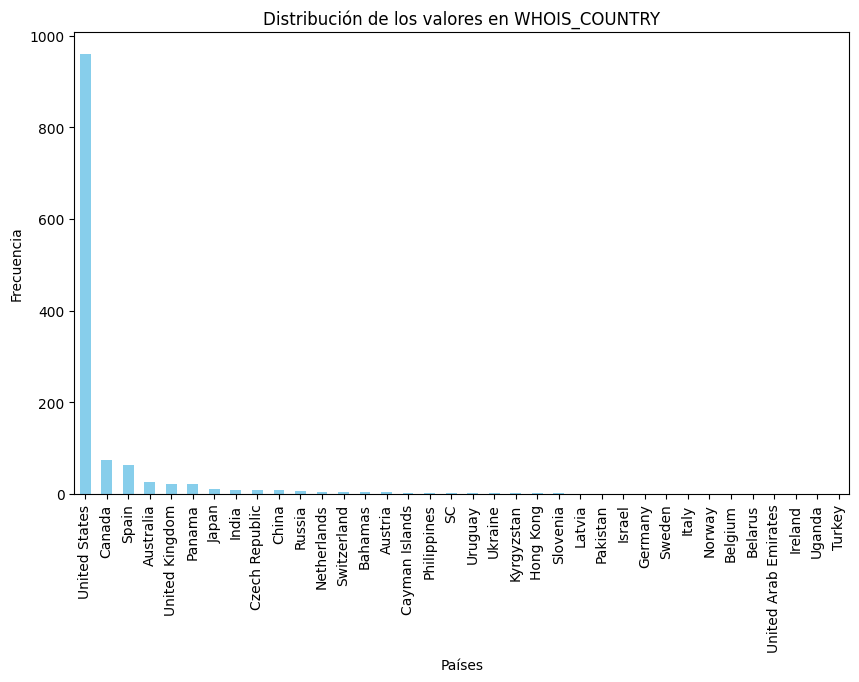

In [113]:
plt.figure(figsize=(10, 6))
country_counts.plot(kind='bar', color='skyblue')
plt.title('Distribución de los valores en WHOIS_COUNTRY')
plt.xlabel('Países')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)
plt.show()

In [115]:
country_counts.head(10)

WHOIS_COUNTRY
United States     960
Canada             75
Spain              63
Australia          26
United Kingdom     22
Panama             21
Japan              10
India               8
Czech Republic      8
China               8
Name: count, dtype: int64

In [119]:
threshold = 5
rare_countries = country_counts[country_counts < threshold].index
rare_countries

Index(['Bahamas', 'Austria', 'Cayman Islands', 'Philippines', 'SC', 'Uruguay',
       'Ukraine', 'Kyrgyzstan', 'Hong Kong', 'Slovenia', 'Latvia', 'Pakistan',
       'Israel', 'Germany', 'Sweden', 'Italy', 'Norway', 'Belgium', 'Belarus',
       'United Arab Emirates', 'Ireland', 'Uganda', 'Turkey'],
      dtype='object', name='WHOIS_COUNTRY')

In [ ]:
websites_cleaned['WHOIS_COUNTRY'] = websites_cleaned['WHOIS_COUNTRY'].replace(rare_countries, 'Other')


In [121]:
websites_cleaned['WHOIS_COUNTRY'].value_counts()

WHOIS_COUNTRY
United States           960
Canada                   75
Spain                    63
Australia                26
United Kingdom           22
Panama                   21
Japan                    10
India                     8
Czech Republic            8
China                     8
Russia                    6
Netherlands               5
Switzerland               5
Bahamas                   4
Austria                   4
Cayman Islands            3
Philippines               3
SC                        3
Uruguay                   2
Ukraine                   2
Kyrgyzstan                2
Hong Kong                 2
Slovenia                  2
Latvia                    1
Pakistan                  1
Israel                    1
Germany                   1
Sweden                    1
Italy                     1
Norway                    1
Belgium                   1
Belarus                   1
United Arab Emirates      1
Ireland                   1
Uganda                    1
Turkey

#### After verifying, now let's keep the top 10 values of the column and re-label other columns with `OTHER`.

In [123]:
# Your code here
top_10_countries = websites_cleaned['WHOIS_COUNTRY'].value_counts().nlargest(10).index
top_10_countries

Index(['United States', 'Canada', 'Spain', 'Australia', 'United Kingdom',
       'Panama', 'Japan', 'India', 'Czech Republic', 'China'],
      dtype='object', name='WHOIS_COUNTRY')

In [ ]:
websites_cleaned['WHOIS_COUNTRY'] = websites_cleaned['WHOIS_COUNTRY'].apply(lambda x: x if x in top_10_countries else 'OTHER')


In [125]:
websites_cleaned['WHOIS_COUNTRY'].value_counts()

WHOIS_COUNTRY
United States           960
Canada                   75
Spain                    63
Australia                26
United Kingdom           22
Panama                   21
Japan                    10
India                     8
Czech Republic            8
China                     8
Russia                    6
Netherlands               5
Switzerland               5
Bahamas                   4
Austria                   4
Cayman Islands            3
Philippines               3
SC                        3
Uruguay                   2
Ukraine                   2
Kyrgyzstan                2
Hong Kong                 2
Slovenia                  2
Latvia                    1
Pakistan                  1
Israel                    1
Germany                   1
Sweden                    1
Italy                     1
Norway                    1
Belgium                   1
Belarus                   1
United Arab Emirates      1
Ireland                   1
Uganda                    1
Turkey

Now since `WHOIS_COUNTRY` has been re-labelled, we don't need `WHOIS_STATEPRO` any more because the values of the states or provinces may not be relevant any more. We'll drop this column.

In addition, we will also drop `WHOIS_REGDATE` and `WHOIS_UPDATED_DATE`. These are the registration and update dates of the website domains. Not of our concerns.

#### In the next cell, drop `['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE']`.

In [127]:
# Your code here
websites_cleaned = websites_cleaned.drop(['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE'], axis=1)
websites_cleaned.columns

Index(['URL', 'CHARSET', 'SERVER', 'WHOIS_COUNTRY',
       'TCP_CONVERSATION_EXCHANGE', 'DIST_REMOTE_TCP_PORT', 'REMOTE_IPS',
       'APP_BYTES', 'SOURCE_APP_PACKETS', 'REMOTE_APP_PACKETS',
       'SOURCE_APP_BYTES', 'REMOTE_APP_BYTES', 'APP_PACKETS',
       'DNS_QUERY_TIMES'],
      dtype='object')

# Challenge 5 - Handle Remaining Categorical Data & Convert to Ordinal

Now print the `dtypes` of the data again. Besides `WHOIS_COUNTRY` which we already fixed, there should be 3 categorical columns left: `URL`, `CHARSET`, and `SERVER`.

In [129]:
# Your code here
websites_cleaned.dtypes

URL                           object
CHARSET                       object
SERVER                        object
WHOIS_COUNTRY                 object
TCP_CONVERSATION_EXCHANGE      int64
DIST_REMOTE_TCP_PORT           int64
REMOTE_IPS                     int64
APP_BYTES                      int64
SOURCE_APP_PACKETS             int64
REMOTE_APP_PACKETS             int64
SOURCE_APP_BYTES               int64
REMOTE_APP_BYTES               int64
APP_PACKETS                    int64
DNS_QUERY_TIMES              float64
dtype: object

In [133]:
websites_cleaned['CHARSET'] = pd.factorize(websites_cleaned['CHARSET'])[0]
websites_cleaned['SERVER'] = pd.factorize(websites_cleaned['SERVER'])[0]
websites_cleaned.dtypes

URL                           object
CHARSET                        int64
SERVER                         int64
WHOIS_COUNTRY                 object
TCP_CONVERSATION_EXCHANGE      int64
DIST_REMOTE_TCP_PORT           int64
REMOTE_IPS                     int64
APP_BYTES                      int64
SOURCE_APP_PACKETS             int64
REMOTE_APP_PACKETS             int64
SOURCE_APP_BYTES               int64
REMOTE_APP_BYTES               int64
APP_PACKETS                    int64
DNS_QUERY_TIMES              float64
dtype: object

In [135]:
websites_cleaned = websites_cleaned.drop(columns=['URL'])
websites_cleaned 

,CHARSET,SERVER,WHOIS_COUNTRY,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES
3,0,0,United States,31,22,3,3812,39,37,18784,4380,39,8.0
5,1,0,SC,11,6,9,894,11,13,838,894,11,0.0
6,2,1,United States,12,0,3,1189,14,13,8559,1327,14,2.0
7,3,2,United States,0,0,0,0,0,0,0,0,0,0.0
10,4,3,United States,0,0,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1776,1,3,Spain,0,0,0,0,0,3,186,0,0,0.0
1777,1,3,Spain,0,0,0,0,0,2,124,0,0,0.0
1778,4,192,United States,83,2,6,6631,87,89,132181,6945,87,4.0
1779,0,8,United States,0,0,0,0,0,0,0,0,0,0.0


In [137]:
from sklearn.preprocessing import MinMaxScaler


In [139]:
numeric_columns = websites_cleaned.select_dtypes(include=['int64', 'float64']).columns


In [141]:
scaler = MinMaxScaler()


In [143]:
websites_cleaned[numeric_columns] = scaler.fit_transform(websites_cleaned[numeric_columns])


In [145]:
websites_cleaned.head()

,CHARSET,SERVER,WHOIS_COUNTRY,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES
3,0.000000,0.000000,United States,0.025963,0.031073,0.1875,0.001613,0.032554,0.028816,0.009118,0.001854,0.032554,0.571429
5,0.166667,0.000000,SC,0.009213,0.008475,0.5625,0.000378,0.009182,0.010125,0.000407,0.000378,0.009182,0.000000
6,0.333333,0.005208,United States,0.010050,0.000000,0.1875,0.000503,0.011686,0.010125,0.004155,0.000562,0.011686,0.142857
7,0.500000,0.010417,United States,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10,0.666667,0.015625,United States,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [147]:
from sklearn.preprocessing import StandardScaler


In [149]:
scaler = StandardScaler()


In [151]:
websites_cleaned[numeric_columns] = scaler.fit_transform(websites_cleaned[numeric_columns])


In [153]:
websites_cleaned.head()

,CHARSET,SERVER,WHOIS_COUNTRY,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES
3,-1.137986,-0.689157,United States,0.335029,0.696619,0.050815,0.005376,0.458169,0.363993,0.032058,0.011598,0.458169,2.193922
5,-0.459083,-0.689157,SC,-0.107568,0.027769,1.816943,-0.038389,-0.148837,-0.104218,-0.209305,-0.040686,-0.148837,-0.727047
6,0.219820,-0.667713,United States,-0.085439,-0.223050,0.050815,-0.033965,-0.083801,-0.104218,-0.105462,-0.034191,-0.083801,0.003195
7,0.898723,-0.646268,United States,-0.350997,-0.223050,-0.832248,-0.051798,-0.387304,-0.357832,-0.220576,-0.054094,-0.387304,-0.727047
10,1.577626,-0.624824,United States,-0.350997,-0.223050,-0.832248,-0.051798,-0.387304,-0.357832,-0.220576,-0.054094,-0.387304,-0.727047


In [155]:
websites_cleaned.dtypes

CHARSET                      float64
SERVER                       float64
WHOIS_COUNTRY                 object
TCP_CONVERSATION_EXCHANGE    float64
DIST_REMOTE_TCP_PORT         float64
REMOTE_IPS                   float64
APP_BYTES                    float64
SOURCE_APP_PACKETS           float64
REMOTE_APP_PACKETS           float64
SOURCE_APP_BYTES             float64
REMOTE_APP_BYTES             float64
APP_PACKETS                  float64
DNS_QUERY_TIMES              float64
dtype: object

In [157]:
websites_cleaned.head()

,CHARSET,SERVER,WHOIS_COUNTRY,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES
3,-1.137986,-0.689157,United States,0.335029,0.696619,0.050815,0.005376,0.458169,0.363993,0.032058,0.011598,0.458169,2.193922
5,-0.459083,-0.689157,SC,-0.107568,0.027769,1.816943,-0.038389,-0.148837,-0.104218,-0.209305,-0.040686,-0.148837,-0.727047
6,0.219820,-0.667713,United States,-0.085439,-0.223050,0.050815,-0.033965,-0.083801,-0.104218,-0.105462,-0.034191,-0.083801,0.003195
7,0.898723,-0.646268,United States,-0.350997,-0.223050,-0.832248,-0.051798,-0.387304,-0.357832,-0.220576,-0.054094,-0.387304,-0.727047
10,1.577626,-0.624824,United States,-0.350997,-0.223050,-0.832248,-0.051798,-0.387304,-0.357832,-0.220576,-0.054094,-0.387304,-0.727047


#### `URL` is easy. We'll simply drop it because it has too many unique values that there's no way for us to consolidate.

In [161]:
# Your code here
websites_cleaned.columns

Index(['CHARSET', 'SERVER', 'WHOIS_COUNTRY', 'TCP_CONVERSATION_EXCHANGE',
       'DIST_REMOTE_TCP_PORT', 'REMOTE_IPS', 'APP_BYTES', 'SOURCE_APP_PACKETS',
       'REMOTE_APP_PACKETS', 'SOURCE_APP_BYTES', 'REMOTE_APP_BYTES',
       'APP_PACKETS', 'DNS_QUERY_TIMES'],
      dtype='object')

#### Print the unique value counts of `CHARSET`. You see there are only a few unique values. So we can keep it as it is.

In [163]:
# Your code here
char_count = websites_cleaned['CHARSET'].value_counts()
char_count

CHARSET
-0.459083    520
 1.577626    279
-1.137986    275
 0.898723     98
 0.219820     83
 2.256528      1
 2.935431      1
Name: count, dtype: int64

`SERVER` is a little more complicated. Print its unique values and think about how you can consolidate those values.

#### Before you think of your own solution, don't read the instructions that come next.

In [165]:
# Your code here
websites_cleaned['SERVER'].value_counts()


SERVER
-0.624824    311
-0.689157    144
-0.517601     80
-0.646268     76
-0.324601     49
            ... 
-0.002934      1
 0.082844      1
 1.583956      1
 1.562512      1
 3.428180      1
Name: count, Length: 193, dtype: int64

In [171]:
websites_cleaned['SERVER'] = websites_cleaned['SERVER'].astype(float)
websites_cleaned['SERVER'].dtype

dtype('float64')

In [173]:
websites_cleaned.columns

Index(['CHARSET', 'SERVER', 'WHOIS_COUNTRY', 'TCP_CONVERSATION_EXCHANGE',
       'DIST_REMOTE_TCP_PORT', 'REMOTE_IPS', 'APP_BYTES', 'SOURCE_APP_PACKETS',
       'REMOTE_APP_PACKETS', 'SOURCE_APP_BYTES', 'REMOTE_APP_BYTES',
       'APP_PACKETS', 'DNS_QUERY_TIMES'],
      dtype='object')

In [175]:
websites_cleaned.isnull().sum()

CHARSET                      0
SERVER                       0
WHOIS_COUNTRY                0
TCP_CONVERSATION_EXCHANGE    0
DIST_REMOTE_TCP_PORT         0
REMOTE_IPS                   0
APP_BYTES                    0
SOURCE_APP_PACKETS           0
REMOTE_APP_PACKETS           0
SOURCE_APP_BYTES             0
REMOTE_APP_BYTES             0
APP_PACKETS                  0
DNS_QUERY_TIMES              0
dtype: int64

In [177]:
websites_cleaned.dtypes

CHARSET                      float64
SERVER                       float64
WHOIS_COUNTRY                 object
TCP_CONVERSATION_EXCHANGE    float64
DIST_REMOTE_TCP_PORT         float64
REMOTE_IPS                   float64
APP_BYTES                    float64
SOURCE_APP_PACKETS           float64
REMOTE_APP_PACKETS           float64
SOURCE_APP_BYTES             float64
REMOTE_APP_BYTES             float64
APP_PACKETS                  float64
DNS_QUERY_TIMES              float64
dtype: object

In [179]:
websites_cleaned['SERVER'].unique()

array([-6.89157201e-01, -6.67712736e-01, -6.46268271e-01, -6.24823806e-01,
       -6.03379341e-01, -5.81934877e-01, -5.60490412e-01, -5.39045947e-01,
       -5.17601482e-01, -4.96157017e-01, -4.74712552e-01, -4.53268088e-01,
       -4.31823623e-01, -4.10379158e-01, -3.88934693e-01, -3.67490228e-01,
       -3.46045763e-01, -3.24601299e-01, -3.03156834e-01, -2.81712369e-01,
       -2.60267904e-01, -2.38823439e-01, -2.17378974e-01, -1.95934510e-01,
       -1.74490045e-01, -1.53045580e-01, -1.31601115e-01, -1.10156650e-01,
       -8.87121855e-02, -6.72677206e-02, -4.58232558e-02, -2.43787910e-02,
       -2.93432613e-03,  1.85101387e-02,  3.99546035e-02,  6.13990684e-02,
        8.28435332e-02,  1.04287998e-01,  1.25732463e-01,  1.47176928e-01,
        1.68621393e-01,  1.90065857e-01,  2.11510322e-01,  2.32954787e-01,
        2.54399252e-01,  2.75843717e-01,  2.97288182e-01,  3.18732646e-01,
        3.40177111e-01,  3.61621576e-01,  3.83066041e-01,  4.04510506e-01,
        4.25954971e-01,  

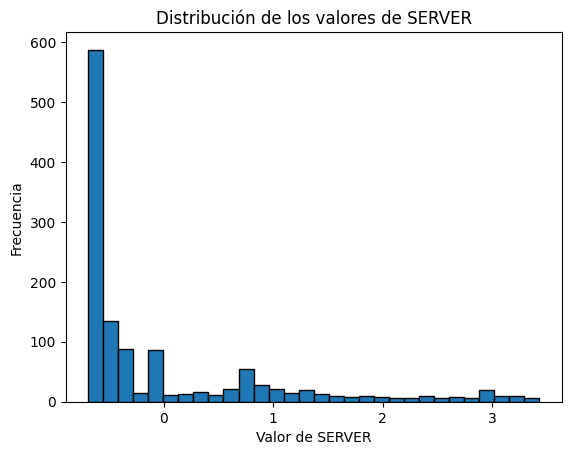

In [181]:
import matplotlib.pyplot as plt
plt.hist(websites_cleaned['SERVER'], bins=30, edgecolor='black')
plt.title('Distribución de los valores de SERVER')
plt.xlabel('Valor de SERVER')
plt.ylabel('Frecuencia')
plt.show()

In [183]:
bins = [-float('inf'), -0.5, 0, 0.5, float('inf')]  
labels = ['Bajo', 'Medio-bajo', 'Medio-alto', 'Alto']

websites_cleaned['SERVER_CONSOLIDATED'] = pd.cut(websites_cleaned['SERVER'], bins=bins, labels=labels)

print(websites_cleaned[['SERVER', 'SERVER_CONSOLIDATED']].head())

      SERVER SERVER_CONSOLIDATED
3  -0.689157                Bajo
5  -0.689157                Bajo
6  -0.667713                Bajo
7  -0.646268                Bajo
10 -0.624824                Bajo


In [185]:
websites_cleaned['SERVER_CONSOLIDATED'].value_counts()

SERVER_CONSOLIDATED
Bajo          669
Alto          298
Medio-bajo    241
Medio-alto     49
Name: count, dtype: int64

![Think Hard](../images/think-hard.jpg)

In [24]:
# Your comment here


Although there are so many unique values in the `SERVER` column, there are actually only 3 main server types: `Microsoft`, `Apache`, and `nginx`. Just check if each `SERVER` value contains any of those server types and re-label them. For `SERVER` values that don't contain any of those substrings, label with `Other`.

At the end, your `SERVER` column should only contain 4 unique values: `Microsoft`, `Apache`, `nginx`, and `Other`.

In [187]:
# Your code here
import pandas as pd
import numpy as np

In [189]:
def label_server(row):
    if 'Microsoft' in str(row):
        return 'Microsoft'
    elif 'Apache' in str(row):
        return 'Apache'
    elif 'nginx' in str(row):
        return 'nginx'
    else:
        return 'Other'

In [197]:
websites_cleaned['SERVER'] = websites_cleaned['SERVER'].apply(label_server)
websites_cleaned['SERVER'] 

3       Other
5       Other
6       Other
7       Other
10      Other
        ...  
1776    Other
1777    Other
1778    Other
1779    Other
1780    Other
Name: SERVER, Length: 1257, dtype: object

In [193]:
websites_cleaned['SERVER'].unique()

array(['Other'], dtype=object)

In [195]:
# Count `SERVER` value counts here
websites_cleaned['SERVER'].value_counts()

SERVER
Other    1257
Name: count, dtype: int64

OK, all our categorical data are fixed now. **Let's convert them to ordinal data using Pandas' `get_dummies` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)). Also, assign the data with dummy values to a new variable `website_dummy`.**

In [199]:
# Your code here
website_dummy = pd.get_dummies(websites_cleaned, columns=['SERVER'])
website_dummy

,CHARSET,WHOIS_COUNTRY,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,SERVER_CONSOLIDATED,SERVER_Other
3,-1.137986,United States,0.335029,0.696619,0.050815,0.005376,0.458169,0.363993,0.032058,0.011598,0.458169,2.193922,Bajo,True
5,-0.459083,SC,-0.107568,0.027769,1.816943,-0.038389,-0.148837,-0.104218,-0.209305,-0.040686,-0.148837,-0.727047,Bajo,True
6,0.219820,United States,-0.085439,-0.223050,0.050815,-0.033965,-0.083801,-0.104218,-0.105462,-0.034191,-0.083801,0.003195,Bajo,True
7,0.898723,United States,-0.350997,-0.223050,-0.832248,-0.051798,-0.387304,-0.357832,-0.220576,-0.054094,-0.387304,-0.727047,Bajo,True
10,1.577626,United States,-0.350997,-0.223050,-0.832248,-0.051798,-0.387304,-0.357832,-0.220576,-0.054094,-0.387304,-0.727047,Bajo,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1776,-0.459083,Spain,-0.350997,-0.223050,-0.832248,-0.051798,-0.387304,-0.299305,-0.218074,-0.054094,-0.387304,-0.727047,Bajo,True
1777,-0.459083,Spain,-0.350997,-0.223050,-0.832248,-0.051798,-0.387304,-0.318814,-0.218908,-0.054094,-0.387304,-0.727047,Bajo,True
1778,1.577626,United States,1.485782,-0.139444,0.933879,0.047657,1.498751,1.378450,1.557184,0.050069,1.498751,0.733438,Alto,True
1779,-1.137986,United States,-0.350997,-0.223050,-0.832248,-0.051798,-0.387304,-0.357832,-0.220576,-0.054094,-0.387304,-0.727047,Bajo,True


Now, inspect `website_dummy` to make sure the data and types are intended - there shouldn't be any categorical columns at this point.

In [201]:
# Your code here
website_dummy.dtypes

CHARSET                       float64
WHOIS_COUNTRY                  object
TCP_CONVERSATION_EXCHANGE     float64
DIST_REMOTE_TCP_PORT          float64
REMOTE_IPS                    float64
APP_BYTES                     float64
SOURCE_APP_PACKETS            float64
REMOTE_APP_PACKETS            float64
SOURCE_APP_BYTES              float64
REMOTE_APP_BYTES              float64
APP_PACKETS                   float64
DNS_QUERY_TIMES               float64
SERVER_CONSOLIDATED          category
SERVER_Other                     bool
dtype: object

In [203]:
website_dummy = pd.get_dummies(website_dummy, columns=['WHOIS_COUNTRY'], drop_first=True)
website_dummy 

,CHARSET,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,...,WHOIS_COUNTRY_Spain,WHOIS_COUNTRY_Sweden,WHOIS_COUNTRY_Switzerland,WHOIS_COUNTRY_Turkey,WHOIS_COUNTRY_Uganda,WHOIS_COUNTRY_Ukraine,WHOIS_COUNTRY_United Arab Emirates,WHOIS_COUNTRY_United Kingdom,WHOIS_COUNTRY_United States,WHOIS_COUNTRY_Uruguay
3,-1.137986,0.335029,0.696619,0.050815,0.005376,0.458169,0.363993,0.032058,0.011598,0.458169,...,False,False,False,False,False,False,False,False,True,False
5,-0.459083,-0.107568,0.027769,1.816943,-0.038389,-0.148837,-0.104218,-0.209305,-0.040686,-0.148837,...,False,False,False,False,False,False,False,False,False,False
6,0.219820,-0.085439,-0.223050,0.050815,-0.033965,-0.083801,-0.104218,-0.105462,-0.034191,-0.083801,...,False,False,False,False,False,False,False,False,True,False
7,0.898723,-0.350997,-0.223050,-0.832248,-0.051798,-0.387304,-0.357832,-0.220576,-0.054094,-0.387304,...,False,False,False,False,False,False,False,False,True,False
10,1.577626,-0.350997,-0.223050,-0.832248,-0.051798,-0.387304,-0.357832,-0.220576,-0.054094,-0.387304,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1776,-0.459083,-0.350997,-0.223050,-0.832248,-0.051798,-0.387304,-0.299305,-0.218074,-0.054094,-0.387304,...,True,False,False,False,False,False,False,False,False,False
1777,-0.459083,-0.350997,-0.223050,-0.832248,-0.051798,-0.387304,-0.318814,-0.218908,-0.054094,-0.387304,...,True,False,False,False,False,False,False,False,False,False
1778,1.577626,1.485782,-0.139444,0.933879,0.047657,1.498751,1.378450,1.557184,0.050069,1.498751,...,False,False,False,False,False,False,False,False,True,False
1779,-1.137986,-0.350997,-0.223050,-0.832248,-0.051798,-0.387304,-0.357832,-0.220576,-0.054094,-0.387304,...,False,False,False,False,False,False,False,False,True,False


In [207]:
from sklearn.preprocessing import LabelEncoder


le = LabelEncoder()
website_dummy['SERVER_CONSOLIDATED'] = le.fit_transform(website_dummy['SERVER_CONSOLIDATED'])

In [209]:
website_dummy['SERVER_Other'] = website_dummy['SERVER_Other'].astype(int)


In [211]:
website_dummy.dtypes

CHARSET                               float64
TCP_CONVERSATION_EXCHANGE             float64
DIST_REMOTE_TCP_PORT                  float64
REMOTE_IPS                            float64
APP_BYTES                             float64
SOURCE_APP_PACKETS                    float64
REMOTE_APP_PACKETS                    float64
SOURCE_APP_BYTES                      float64
REMOTE_APP_BYTES                      float64
APP_PACKETS                           float64
DNS_QUERY_TIMES                       float64
SERVER_CONSOLIDATED                     int32
SERVER_Other                            int32
WHOIS_COUNTRY_Austria                    bool
WHOIS_COUNTRY_Bahamas                    bool
WHOIS_COUNTRY_Belarus                    bool
WHOIS_COUNTRY_Belgium                    bool
WHOIS_COUNTRY_Canada                     bool
WHOIS_COUNTRY_Cayman Islands             bool
WHOIS_COUNTRY_China                      bool
WHOIS_COUNTRY_Czech Republic             bool
WHOIS_COUNTRY_Germany             

# Challenge 6 - Modeling, Prediction, and Evaluation

We'll start off this section by splitting the data to train and test. **Name your 4 variables `X_train`, `X_test`, `y_train`, and `y_test`. Select 80% of the data for training and 20% for testing.**

In [219]:
from sklearn.model_selection import train_test_split

# Your code here:
X = website_dummy.drop(['SERVER_Other'], axis=1) 
y = website_dummy['SERVER_Other']


In [221]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test

(       CHARSET  TCP_CONVERSATION_EXCHANGE  DIST_REMOTE_TCP_PORT  REMOTE_IPS  \
 1043 -0.459083                  -0.350997             -0.223050   -0.832248   
 323  -1.137986                   0.047341             -0.139444    1.522588   
 1481 -0.459083                  -0.350997             -0.223050   -0.832248   
 1655  1.577626                  -0.240348             -0.139444    0.050815   
 572  -0.459083                   0.224380             -0.223050    1.522588   
 ...        ...                        ...                   ...         ...   
 1521  1.577626                  -0.328867             -0.181247   -0.537894   
 1583 -0.459083                  -0.063309             -0.097640    0.933879   
 1626 -0.459083                  -0.350997             -0.223050   -0.832248   
 1276 -0.459083                  -0.019049             -0.139444    0.639525   
 1622 -0.459083                  -0.262477             -0.097640   -0.243539   
 
       APP_BYTES  SOURCE_APP_PACKETS  

#### In this lab, we will try two different models and compare our results.

The first model we will use in this lab is logistic regression. We have previously learned about logistic regression as a classification algorithm. In the cell below, load `LogisticRegression` from scikit-learn and initialize the model.

In [225]:
y_train.value_counts()

SERVER_Other
1    1005
Name: count, dtype: int64

In [227]:
y.value_counts()

SERVER_Other
1    1257
Name: count, dtype: int64

In [231]:
y = website_dummy['SERVER_CONSOLIDATED']
y.value_counts()

SERVER_CONSOLIDATED
1    669
0    298
3    241
2     49
Name: count, dtype: int64

In [233]:
# Your code here:
from sklearn.model_selection import train_test_split
X = website_dummy.drop(columns=['SERVER_CONSOLIDATED'])  # Asegúrate de que 'SERVER_CONSOLIDATED' no esté en X
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [235]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

C:\Users\hugoe\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [239]:
y_pred = logreg.predict(X_test)
y_pred

array([1, 3, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       3, 1, 1, 1, 1, 1, 1, 1, 1, 0])

Next, fit the model to our training data. We have already separated our data into 4 parts. Use those in your model.

In [241]:
# Your code here:
logreg.fit(X_train, y_train)



C:\Users\hugoe\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

finally, import `confusion_matrix` and `accuracy_score` from `sklearn.metrics` and fit our testing data. Assign the fitted data to `y_pred` and print the confusion matrix as well as the accuracy score

In [243]:
# Your code here:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = logreg.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[  6,  53,   0,   1],
       [  1, 130,   0,   3],
       [  0,  10,   0,   0],
       [  2,  46,   0,   0]], dtype=int64)

In [245]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.5396825396825397

What are your thoughts on the performance of the model? Write your conclusions below.

 Your conclusions here:

 
En general, aunque el modelo tiene una precisión del 54%, lo que es un punto de partida, hay margen de mejora. Especialmente, se debe trabajar en diferenciar mejor las clases 2 y 3, explorar técnicas para balancear las clases, y probar otros modelos para mejorar la precisión general.


#### Our second algorithm is is K-Nearest Neighbors. 

Though is it not required, we will fit a model using the training data and then test the performance of the model using the testing data. Start by loading `KNeighborsClassifier` from scikit-learn and then initializing and fitting the model. We'll start off with a model where k=3.

In [251]:
# Your code here:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score


In [253]:
knn = KNeighborsClassifier(n_neighbors=3)
knn

KNeighborsClassifier(n_neighbors=3)

In [255]:
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

In [259]:
y_pred_knn = knn.predict(X_test)
y_pred_knn

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 3, 1, 1, 1, 1, 1, 1, 0, 0, 0, 3, 0, 1, 0, 1, 0, 1, 1, 1, 3, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 3, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 3, 3, 1, 1, 3, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 3, 1, 3, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 0, 1, 1, 1, 0, 3, 1, 0,
       0, 1, 3, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 3, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 3, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 3, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 3, 1,
       1, 3, 0, 1, 1, 3, 1, 1, 1, 0])

In [261]:
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
conf_matrix_knn

array([[ 18,  40,   0,   2],
       [ 20, 107,   0,   7],
       [  3,   6,   0,   1],
       [ 11,  27,   0,  10]], dtype=int64)

In [263]:
accuracy_knn = accuracy_score(y_test, y_pred_knn)
accuracy_knn 

0.5357142857142857

To test your model, compute the predicted values for the testing sample and print the confusion matrix as well as the accuracy score.

In [265]:
# Your code here:
from sklearn.metrics import confusion_matrix, accuracy_score

In [267]:
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
conf_matrix_knn

array([[ 18,  40,   0,   2],
       [ 20, 107,   0,   7],
       [  3,   6,   0,   1],
       [ 11,  27,   0,  10]], dtype=int64)

In [269]:
accuracy_knn = accuracy_score(y_test, y_pred_knn)
accuracy_knn 

0.5357142857142857

#### We'll create another K-Nearest Neighbors model with k=5. 

Initialize and fit the model below and print the confusion matrix and the accuracy score.

In [271]:
# Your code here:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score


In [273]:
knn_5 = KNeighborsClassifier(n_neighbors=5)
knn_5

KNeighborsClassifier()

In [275]:
knn_5.fit(X_train, y_train)


KNeighborsClassifier()

In [277]:
y_pred_knn_5 = knn_5.predict(X_test)


In [279]:
conf_matrix_knn_5 = confusion_matrix(y_test, y_pred_knn_5)
conf_matrix_knn_5

array([[ 16,  43,   0,   1],
       [ 17, 114,   0,   3],
       [  2,   7,   0,   1],
       [  9,  31,   0,   8]], dtype=int64)

In [281]:
accuracy_knn_5 = accuracy_score(y_test, y_pred_knn_5)
accuracy_knn_5 

0.5476190476190477

Did you see an improvement in the confusion matrix when increasing k to 5? Did you see an improvement in the accuracy score? Write your conclusions below.

 Your conclusions here:

Mejora en el accuracy: Al aumentar k de 3 a 5, el modelo muestra una ligera mejora en el accuracy score (de 0.5397 a 0.5476).

Mejora en la matriz de confusión: Con k =5, se observa una distribución más equilibrada de las predicciones incorrectas, especialmente para la clase 1, con menos errores que con k=3.

Tamaño del cambio: La mejora es pequeña, lo que sugiere que un cambio de k =3 a k=5 tiene un impacto moderado en el rendimiento del modelo.

En resumen, el modelo con k=5 tiene un desempeño ligeramente mejor que con k=3, pero la diferencia no es significativa. Se podría experimentar con valores más altos de k o probar otros modelos para obtener mejoras adicionales. para obtener mejoras adicionales.

# Bonus Challenge - Feature Scaling

Problem-solving in machine learning is iterative. You can improve your model prediction with various techniques (there is a sweetspot for the time you spend and the improvement you receive though). Now you've completed only one iteration of ML analysis. There are more iterations you can conduct to make improvements. In order to be able to do that, you will need deeper knowledge in statistics and master more data analysis techniques. In this bootcamp, we don't have time to achieve that advanced goal. But you will make constant efforts after the bootcamp to eventually get there.

However, now we do want you to learn one of the advanced techniques which is called *feature scaling*. The idea of feature scaling is to standardize/normalize the range of independent variables or features of the data. This can make the outliers more apparent so that you can remove them. This step needs to happen during Challenge 6 after you split the training and test data because you don't want to split the data again which makes it impossible to compare your results with and without feature scaling. For general concepts about feature scaling, click [here](https://en.wikipedia.org/wiki/Feature_scaling). To read deeper, click [here](https://medium.com/greyatom/why-how-and-when-to-scale-your-features-4b30ab09db5e).

In the next cell, attempt to improve your model prediction accuracy by means of feature scaling. A library you can utilize is `sklearn.preprocessing.RobustScaler` ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html)). You'll use the `RobustScaler` to fit and transform your `X_train`, then transform `X_test`. You will use logistic regression to fit and predict your transformed data and obtain the accuracy score in the same way. Compare the accuracy score with your normalized data with the previous accuracy data. Is there an improvement?

In [291]:
# Your code here
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [293]:
scaler = RobustScaler()
scaler

RobustScaler()

In [295]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [297]:
logreg = LogisticRegression(random_state=42)
logreg

LogisticRegression(random_state=42)

In [299]:
logreg.fit(X_train_scaled, y_train)


C:\Users\hugoe\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [301]:
y_pred_scaled = logreg.predict(X_test_scaled)


In [303]:
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)
accuracy_scaled

0.5396825396825397

In [305]:
from sklearn.metrics import confusion_matrix, accuracy_score


In [307]:
conf_matrix_scaled = confusion_matrix(y_test, y_pred_scaled)
conf_matrix_scaled

array([[  6,  54,   0,   0],
       [  2, 130,   0,   2],
       [  0,  10,   0,   0],
       [  2,  46,   0,   0]], dtype=int64)

In [309]:
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)
accuracy_scaled

0.5396825396825397

In [313]:
logreg_no_scaling = LogisticRegression(random_state=42)
logreg_no_scaling.fit(X_train, y_train)

C:\Users\hugoe\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [315]:
y_pred_no_scaling = logreg_no_scaling.predict(X_test)


In [317]:
conf_matrix_no_scaling = confusion_matrix(y_test, y_pred_no_scaling)
conf_matrix_no_scaling

array([[  6,  53,   0,   1],
       [  1, 130,   0,   3],
       [  0,  10,   0,   0],
       [  2,  46,   0,   0]], dtype=int64)

In [319]:
accuracy_no_scaling = accuracy_score(y_test, y_pred_no_scaling)
accuracy_no_scaling

0.5396825396825397

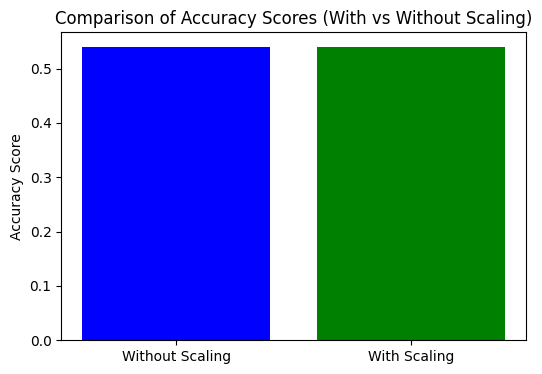

In [321]:
import matplotlib.pyplot as plt

accuracies = [accuracy_no_scaling, accuracy_scaled]

plt.figure(figsize=(6, 4))  
plt.bar(['Without Scaling', 'With Scaling'], accuracies, color=['blue', 'green'])

plt.title('Comparison of Accuracy Scores (With vs Without Scaling)')
plt.ylabel('Accuracy Score')

plt.show()